<a href="https://colab.research.google.com/github/aanchan1/social-network-ads-analysis/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [5]:
X=df.iloc[:,2:4]
print(X.shape)
y=df.iloc[:,-1].values
print(y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(400, 2)
(400,)
(280, 2) (280,) (120, 2) (120,)


**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print('X_train',X_train)
print('X_test',X_test)

X_train [[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]
 [-1.1631724  -1.5849703 ]
 [ 2.17018137 -0.80415605]
 [-1.35925203 -1.46929411]
 [ 0.40546467  2.2901819 ]
 [ 0.79762394  0.75747245]
 [-0.96709276 -0.31253226]
 [ 0.11134522  0.75747245]
 [-0.96709276  0.55503912]
 [ 0.30742485  0.06341534]
 [ 0.69958412 -1.26686079]
 [-0.47689368 -0.0233418 ]
 [-1.7514113   0.3526058 ]
 [-0.67297331  0.12125343]
 [ 0.40546467  0.29476771]
 [-0.28081405  0.06341534]
 [-0.47689368  2.2901819 ]
 [ 0.20938504  0.03449629]
 [ 1.28782302  2.20342476]
 [ 0.79762394  0.26584866]
 [-0.28081405  0.15017248]
 [ 0.0133054  -0.54388463]
 [-0.18277423  0.15017248]
 [-0.08473441  0.23692961]
 [ 0.0133054  -0.25469417]
 [ 2.17018137  1.104501  ]
 [-1.7514113   0.3526058 ]
 [ 1.87606192  0.121

**Fitting Decision Tree Classification to the Training set**

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier_Decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_Decision.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicting the Test set results**

In [10]:
y_pred = classifier_Decision.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

**Making the Confusion Matrix**

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[70  9]
 [ 4 37]]
0.8916666666666667


In [14]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, classifier_Decision.predict(X_test))))
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, classifier_Decision.predict(X_test)), 2))
from sklearn.metrics import roc_auc_score,accuracy_score
print('auroc',roc_auc_score(y_test, classifier_Decision.predict_proba(X_test)[:,1]))
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classifier_Decision.score(X_train,y_train))
print(classifier_Decision.score(X_test,y_test))

Precision: 0.8043478260869565
Recall: 0.9
auroc 0.8942574868786662
Accuracy: 0.8916666666666667
1.0
0.8916666666666667


**Visualising the Training set results**

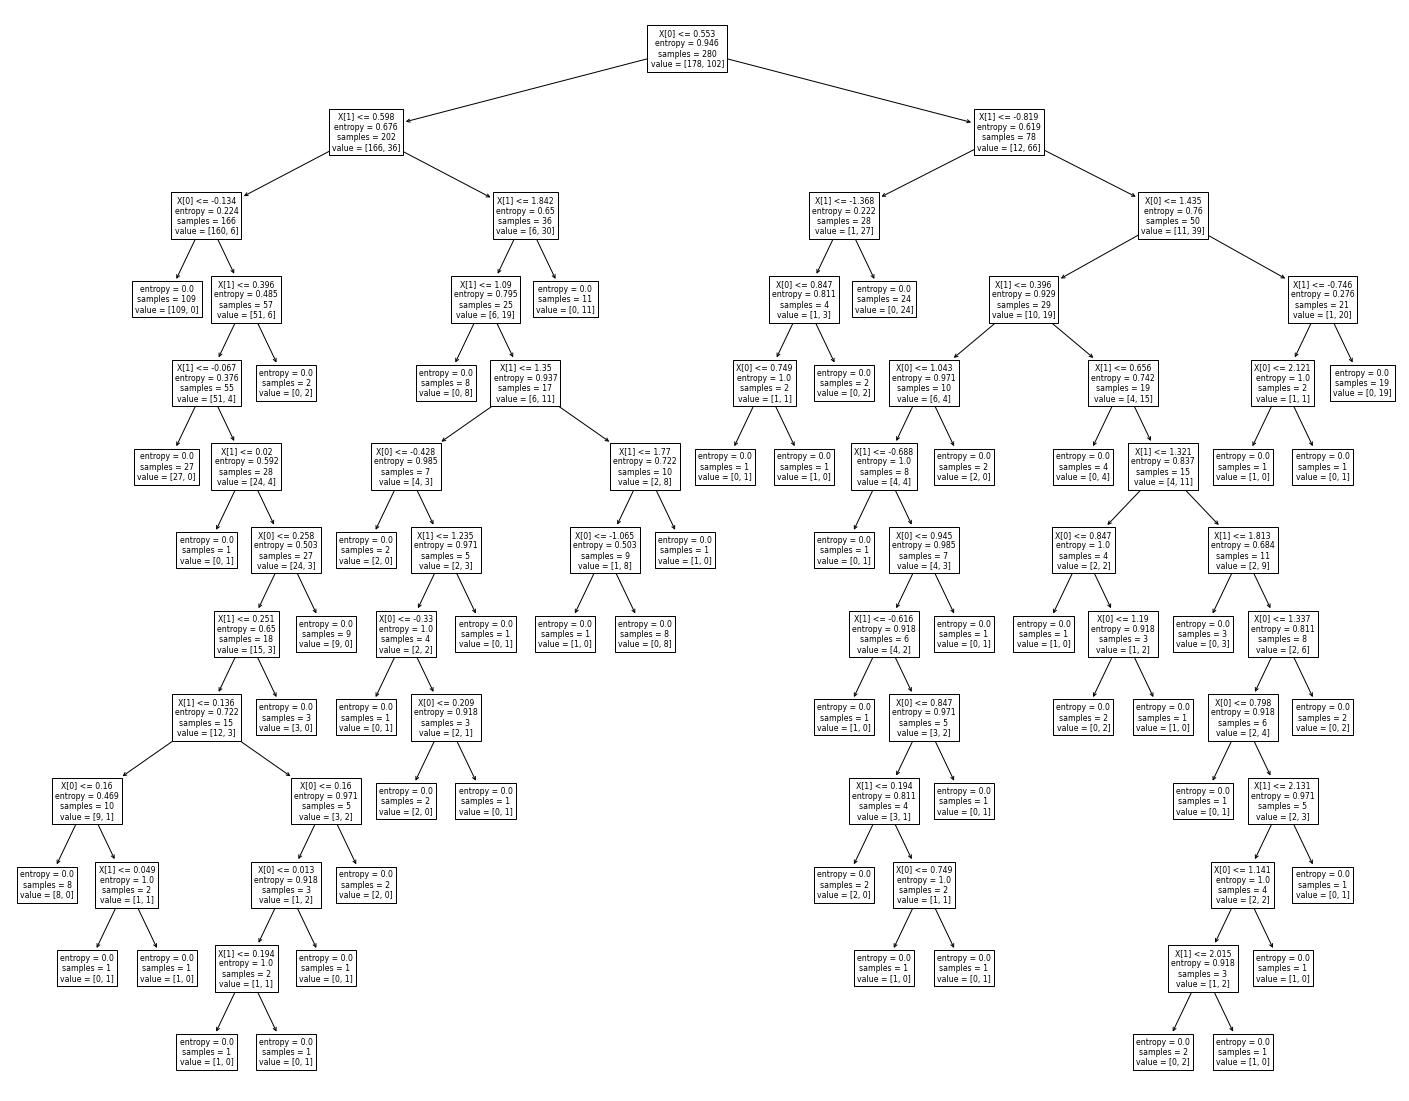

In [17]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
ax = tree.plot_tree(classifier_Decision)

**Visualising the Test set results**

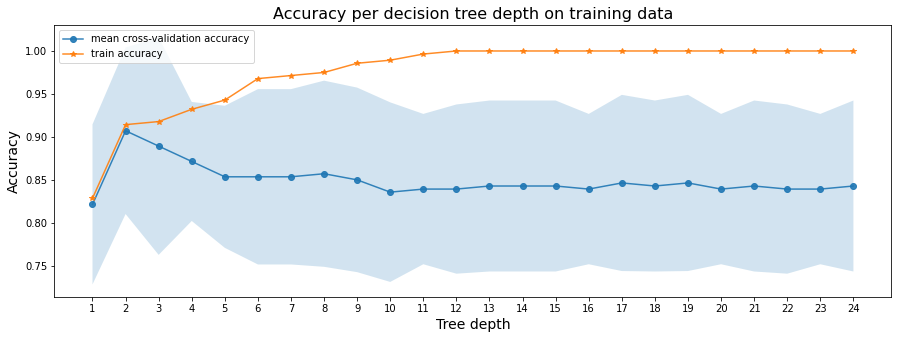

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


from the above graph, the depth of the tree is 2

In [22]:
d = tree.DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
print("Test score: {:.2f}".format(d.score(X_test,y_test)))
print("Test score: {:.2f}".format(d.score(X_train,y_train)))

Test score: 0.92
Test score: 0.91


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
new = d.predict(X_test)

print(confusion_matrix(y_test, new))

[[72  7]
 [ 3 38]]


In [28]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, d.predict(X_test))))
from sklearn.metrics import recall_score
print("Recall:", round(recall_score(y_test, d.predict(X_test)), 2))
from sklearn.metrics import roc_auc_score,accuracy_score
print('auroc',roc_auc_score(y_test, d.predict_proba(X_test)[:,1]))
print("Accuracy:",accuracy_score(y_test, new))

Precision: 0.8444444444444444
Recall: 0.93
auroc 0.9237418956468044
Accuracy: 0.9166666666666666


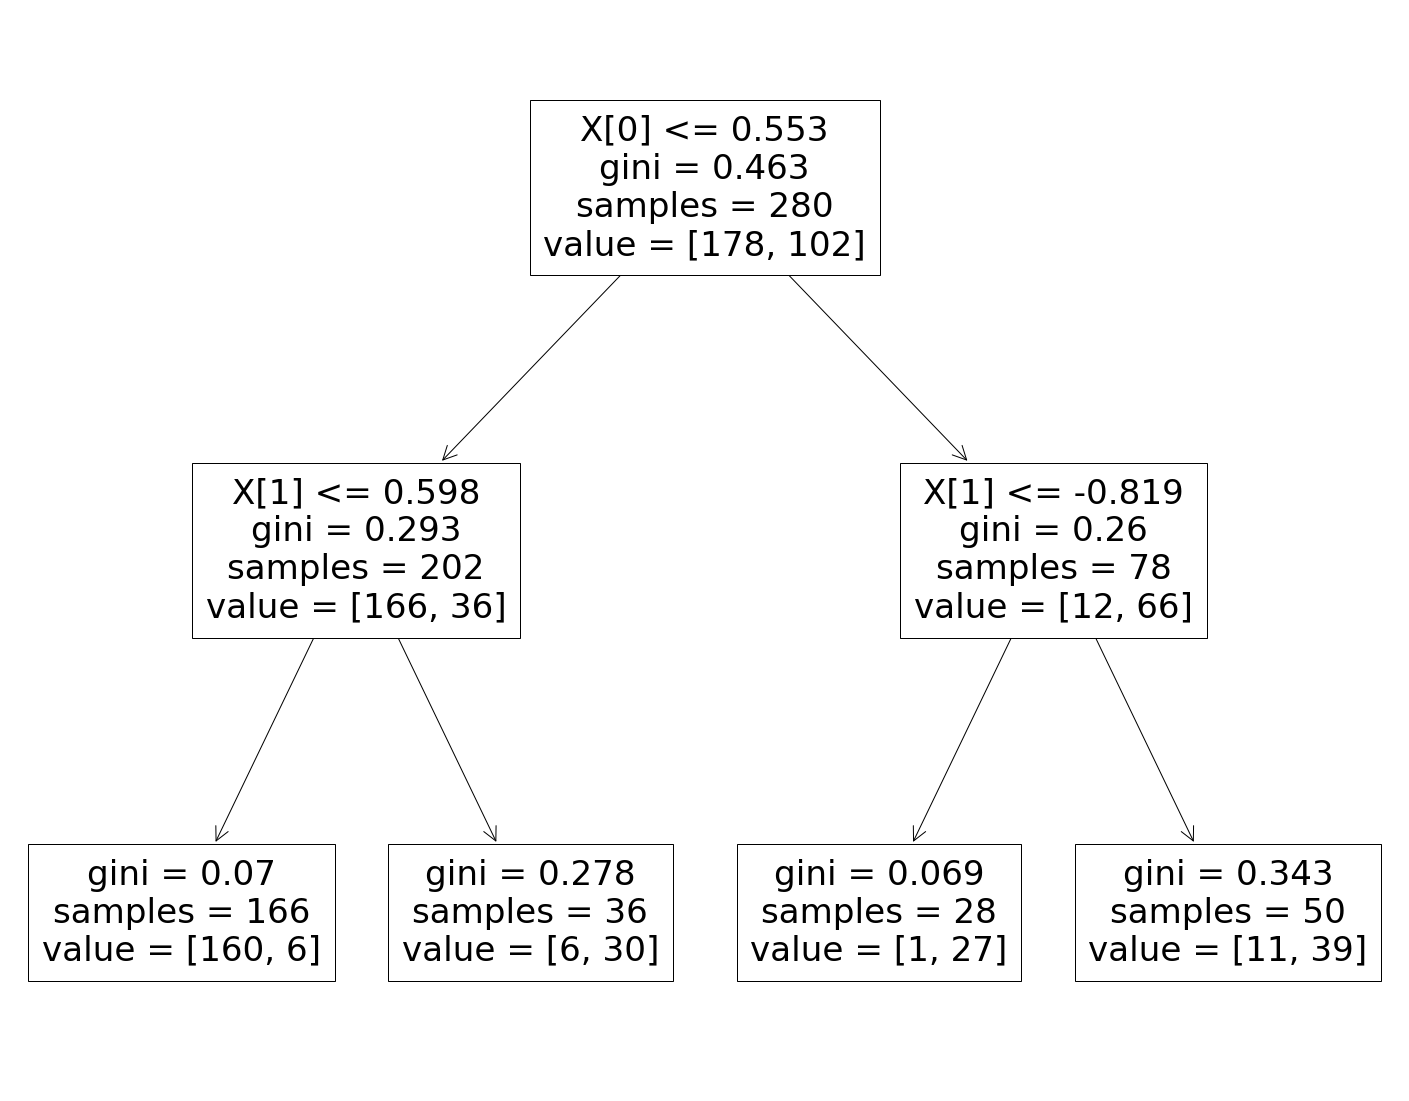

In [29]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
ax = tree.plot_tree(d)